In [237]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [192]:
df = pd.read_csv('Modified2.csv')
print(df)

    CODE      COUNTRY        DATE    HDI  ...    TD    STI       POP        GDP
0    AFG  Afghanistan  19/10/2020  0.498  ...  1492  25.00  38928341   1803.987
1    ALB      Albania  19/10/2020  0.785  ...   451  43.52   2877800  11803.431
2    DZA      Algeria  19/10/2020  0.754  ...  1856  75.93  43851043  13913.839
3    AND      Andorra  19/10/2020  0.858  ...    59  50.00     77265  40886.390
4    AGO       Angola  19/10/2020  0.581  ...   241  71.30  32866268   5819.495
..   ...          ...         ...    ...  ...   ...    ...       ...        ...
204  VEN    Venezuela  19/10/2020  0.761  ...   736  87.96  28435943  16745.022
205  VNM      Vietnam  19/10/2020  0.694  ...    35  51.85  97338583   6171.884
206  YEM        Yemen  19/10/2020  0.452  ...   597  45.37  29825968   1479.147
207  ZMB       Zambia  19/10/2020  0.588  ...   346  44.44  18383956   3689.251
208  ZWE     Zimbabwe  19/10/2020  0.535  ...   231  76.85  14862927   1899.775

[209 rows x 9 columns]


In [193]:
print(df.shape)

(209, 9)


In [194]:
#Kmeans is sensitive to outliers, so we need to remove them first
# IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile
# Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]
# Outer fence = [Q1–3*IQR, Q3+3*IQR]
# The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3.
#Following Tukey, only the probable outliers are treated, which lie outside the outer fence.


In [195]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [196]:
 probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "TC")
 print(probable_outliers_tm)
 print(possible_outliers_tm)

[7, 15, 27, 40, 42, 67, 72, 89, 90, 91, 92, 96, 124, 149, 150, 156, 163, 174, 177, 193, 198, 199]
[7, 15, 18, 27, 40, 42, 67, 72, 89, 90, 91, 92, 95, 96, 124, 135, 144, 149, 150, 156, 163, 174, 177, 193, 196, 198, 199]


In [197]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "TD")
print(probable_outliers_tm)
print(possible_outliers_tm)

[7, 15, 18, 23, 27, 35, 40, 41, 42, 56, 57, 67, 72, 89, 90, 91, 92, 96, 124, 135, 144, 149, 150, 155, 156, 163, 174, 177, 182, 193, 196, 198, 199]
[7, 15, 18, 23, 27, 35, 40, 41, 42, 56, 57, 67, 72, 79, 89, 90, 91, 92, 96, 124, 130, 135, 144, 149, 150, 151, 155, 156, 163, 174, 177, 182, 193, 196, 198, 199]


In [198]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "HDI")
print(probable_outliers_tm)
print(possible_outliers_tm)

[]
[]


In [199]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "GDP")
print(probable_outliers_tm)
print(possible_outliers_tm)

[112, 126]
[74, 94, 112, 114, 126, 154, 168]


In [200]:
df["GDP"].replace({112: df["GDP"].mean, 126: df["GDP"].mean}, inplace=True)

In [201]:
df.isna().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDP        0
dtype: int64

In [202]:
# DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
# df.drop(df.columns[0], axis=1)
# df.drop(columns=['Unnamed: 0'])
df.drop([27,89,199],axis=0,inplace=True)

In [203]:
print(df.shape)

(206, 9)


In [204]:
df.isna().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDP        0
dtype: int64

In [205]:
#Extracting required row
#Just 2 rows - TC, GDP 
x = df.iloc[:, [4,8]].values
print(df.iloc[:, [4,8]])
print(x)
type(x)

        TC        GDP
0    40200   1803.987
1    17055  11803.431
2    54402  13913.839
3     3377  40886.390
4     7462   5819.495
..     ...        ...
204  86636  16745.022
205   1134   6171.884
206   2059   1479.147
207  15853   3689.251
208   8147   1899.775

[206 rows x 2 columns]
[[4.0200000e+04 1.8039870e+03]
 [1.7055000e+04 1.1803431e+04]
 [5.4402000e+04 1.3913839e+04]
 [3.3770000e+03 4.0886390e+04]
 [7.4620000e+03 5.8194950e+03]
 [3.0000000e+00 2.1068000e+04]
 [1.1900000e+02 2.1490943e+04]
 [9.8966700e+05 1.8933907e+04]
 [6.4694000e+04 8.7875800e+03]
 [4.3220000e+03 3.5973781e+04]
 [2.7390000e+04 4.4648710e+04]
 [6.5557000e+04 4.5436686e+04]
 [4.4964000e+04 1.5847419e+04]
 [5.7030000e+03 2.7717847e+04]
 [7.7902000e+04 4.3290705e+04]
 [3.8856900e+05 3.5239840e+03]
 [2.2200000e+02 1.6978068e+04]
 [8.7698000e+04 1.7167967e+04]
 [2.2212600e+05 4.2658576e+04]
 [2.8130000e+03 7.8243620e+03]
 [2.4960000e+03 2.0642360e+03]
 [1.8500000e+02 5.0669315e+04]
 [3.2700000e+02 8.7085970e+03]

numpy.ndarray

In [213]:
from sklearn.preprocessing import StandardScaler #Scaling the values
sc = StandardScaler( )
x = sc.fit_transform(x)
print(x)

[[-2.55292288e-01 -8.04929354e-01]
 [-3.67133252e-01 -4.21344048e-01]
 [-1.86665571e-01 -3.40387397e-01]
 [-4.33227904e-01  6.94297555e-01]
 [-4.13488421e-01 -6.50891803e-01]
 [-4.49531702e-01 -6.59490344e-02]
 [-4.48971169e-01 -4.97246603e-02]
 [ 4.33270964e+00 -1.47814258e-01]
 [-1.36932704e-01 -5.37034093e-01]
 [-4.28661487e-01  5.05846614e-01]
 [-3.17192602e-01  8.38622646e-01]
 [-1.32762527e-01  8.68849928e-01]
 [-2.32271750e-01 -2.66213985e-01]
 [-4.21988237e-01  1.89143508e-01]
 [-7.31091805e-02  7.86528673e-01]
 [ 1.42809180e+00 -7.38949128e-01]
 [-4.48473453e-01 -2.22841539e-01]
 [-2.57730783e-02 -2.15556888e-01]
 [ 6.23808133e-01  7.62279785e-01]
 [-4.35953257e-01 -5.73983775e-01]
 [-4.37485060e-01 -7.94946029e-01]
 [-4.48652244e-01  1.06957705e+00]
 [-4.47966074e-01 -5.40063933e-01]
 [ 2.25853386e-01 -6.09986523e-01]
 [-4.48821371e-01  2.73440991e-02]
 [-2.87373177e-01 -4.24778708e-01]
 [-4.24215875e-01 -2.67750138e-01]
 [-4.49203113e-01  4.39567789e-01]
 [-4.48835867e-01  1

[411.9999999999998, 256.50592987627283, 136.96106013114235, 89.67158180699059, 61.337918528433434, 42.23541398015536, 35.14976303688289, 30.18588020101427, 24.29016891233743, 20.094374798459782]


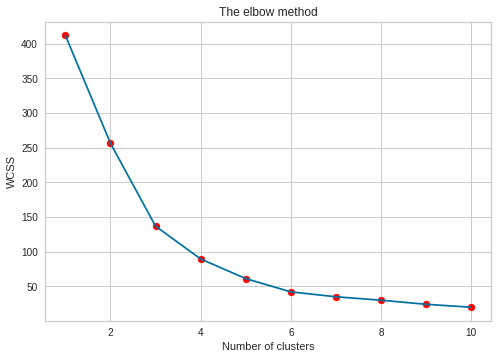

In [218]:
from sklearn.cluster import KMeans
wcss = [] # a list to store the wcss values for the different k values
for i in range(1,11): # we will use i to input different k values in the KMeans model
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
# the 'inertia_' function of the KMeans class is used to get the wcss values
    wcss.append(kmeans.inertia_)
print(wcss)
x_axis = range(1,11)
plt.scatter(x_axis,wcss,color = 'red')
plt.plot(x_axis,wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

In [207]:
# # Import ElbowVisualizer
# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans()
# # k is range of number of clusters.
# visualizer = KElbowVisualizer(model, k=(4,12), timings=False)
# visualizer.fit(x)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

[1 1 1 0 1 1 1 2 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 2 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 2 1 1 1 1 0 1 0
 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 2 2 0 0 1 2 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 2
 1 1 1 1 0 1 2 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 2 1 1 2 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1]


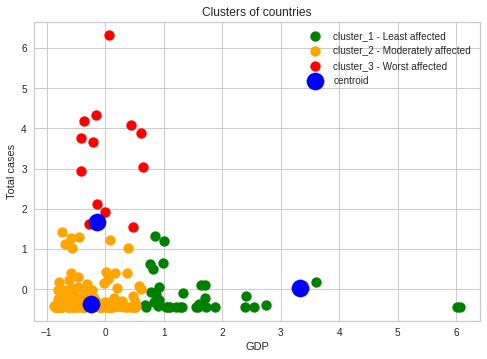

In [238]:
#Visualizing the output
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_clusters=  kmeans.fit_predict(x)
print(y_clusters)
#Now for those countries that have a low gdp but hardly any cases, we can consider them to be not much affected, the fh being least affected
#sh, moderately affected
#We have to do this because of the lack of variables that determine the gdp of the country and historical data
plt.scatter(x[y_clusters==0,1], x[y_clusters==0,0], s=100, c='green', label='cluster_1 - Least affected')
plt.scatter(x[y_clusters==1,1], x[y_clusters==1,0], s=100, c='orange', label='cluster_2 - Moderately affected')
plt.scatter(x[y_clusters==2,1], x[y_clusters==2,0], s=100, c='red', label='cluster_3 - Worst affected')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:, 1] , s=300, c='blue', label='centroid')
plt.title('Clusters of countries')
# ax.set_title("Clusters of countries")
plt.xlabel('GDP')
plt.ylabel('Total cases')
plt.legend( )
plt.show() #28, 90, 200
# plt.scatter(X[:,0], X[:,1])
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
# plt.show()
#Use plotly module to make plots interactive in google colab - can't be achieved by matplotlib... ax, fig = plt.subplot( )... also... fig = plt.figure( ), ax alone can be a parameter to subplot. This is not package import, something separate
